In [1]:
%matplotlib inline
from numpy import linspace,exp
from numpy.random import randn
from scipy.interpolate import LSQUnivariateSpline,UnivariateSpline
from scipy.optimize import bisect
import matplotlib.pyplot as plt
from pylab import*
from scipy.fftpack import rfft
#-----------------------------------------------------------------------
M=10
Q=50
n =  2**16
nf = 2**7
ratio = n/nf
kc = 10.
pi = 3.141592

xn      = linspace(0,1,n)*2.*pi  
xnf     = linspace(0,1,nf+1)   
xnf2    = linspace(0,2,2*nf+1)   

k0      = linspace(0,n/2,n/2+1)
k1      = linspace(0,nf/2,nf/2+1)*(n/nf)
k2      = linspace(0,nf/2,nf/2+1)*(n/nf)
k3      = linspace(0,nf,nf)*(n/(2*nf))
k4      = linspace(0,nf/2,nf/2+1)*(n/nf)

spect    = 1./(1.+(k0[:]/kc)**(5./3.))*exp(-0.01*(k0[:]/kc)**1.)
spect[0] = 0.
varo     = 2.*trapz(y=spect[:],x=k0[:])
L        = spect[1]/varo

print('Integral scale :',L)
print('Size of original sample :',2.*pi/L,'  Int. Scale')
print('Size of sub-sampling    :',2.*pi*float(nf)/float(n)/L,'  Int. Scale')

fftfx   = zeros(n/2+1,dtype=complex)
rfx1    = zeros(nf+1,dtype=float)
rfx2    = zeros(nf+1,dtype=float)
rfx3    = zeros(2*nf+1,dtype=float)
rfx4    = zeros(nf+1,dtype=float)

nspect0 = zeros(n/2+1,dtype=float)
nspect1 = zeros(nf/2+1,dtype=float)
nspect2 = zeros(nf/2+1,dtype=float)
nspect3 = zeros(nf,dtype=float)
nspect4 = zeros(nf/2+1,dtype=float)

var0 = 0.
var1 = 0.
var2 = 0.
var3 = 0.
var4 = 0.

for ns in range(0,int(Q)):

   ang     = rand(n/2)*2.*pi
   for i in range(0,int(n/2)):
       fftfx[i]=sqrt(spect[i])*complex(cos(ang[i]),sin(ang[i]))
   rfx     = irfft(fftfx)*float(n)
   fftfx0  = rfft(rfx)/float(n)

   nspect0[0:n/2] =  nspect0[0:n/2] + fftfx0[0:n:2]**2 +  fftfx0[1:n:2]**2 

   var0=var0+var(rfx)

#=================================

   for j in range(0,M):

       first  = int(rand(1)*n/2)
#--------------------------------
       rfx1[0:nf+1] = rfx[first:first+nf+1]
       var1=var1+var(rfx1)
#--------------------------------
       rfx2[0:nf+1] = rfx1[0:nf+1]
       for k in range(0,nf+1):
           rfx2[k] = rfx1[k] - (rfx1[nf] - rfx1[0])*k/nf - rfx1[0]
       var2=var2+var(rfx2)
#--------------------------------
       rfx3[0:nf+1] = rfx2[:]
       for k in range(0,nf+1):
           rfx3[nf+k] = - rfx2[nf-k]
       var3=var3+var(rfx3)
#--------------------------------
#       window = np.parsen(nf+1)
       window = np.hanning(nf+1)
#       window = np.blackman(nf+1)
       rfx4[0:nf+1] = rfx1[0:nf+1]* window[:]
       var4=var4+var(rfx4)
#--------------------------------
       fftfx1  =  fft(rfx1[0:nf])/float(nf-1)
       fftfx2  =  fft(rfx2[0:nf])/float(nf-1)
       fftfx3  =  fft(rfx3[0:2*nf])/float(2*nf-1)
       fftfx4  =  fft(rfx4[0:nf])/float(nf-1)

       nspect1  =  nspect1 + absolute(fftfx1[0:nf/2+1])**2
       nspect2  =  nspect2 + absolute(fftfx2[0:nf/2+1])**2
       nspect3  =  nspect3 + absolute(fftfx3[0:nf])**2
       nspect4  =  nspect4 + absolute(fftfx4[0:nf/2+1])**2

nspect0 = nspect0/float(Q)
nspect1 = nspect1/float(M)/float(Q)/float(ratio)
nspect2 = nspect2/float(M)/float(Q)/float(ratio)
nspect3 = nspect3/float(M)/float(Q)/float(0.5*ratio)
nspect4 = nspect4/float(M)/float(Q)/float(ratio)*2

/home/nguyen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


('Integral scale :', 0.027509901817231081)
('Size of original sample :', 228.39718010423687, '  Int. Scale')
('Size of sub-sampling    :', 0.44608824239108763, '  Int. Scale')


/home/nguyen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=700:stretch=normal:size=35.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


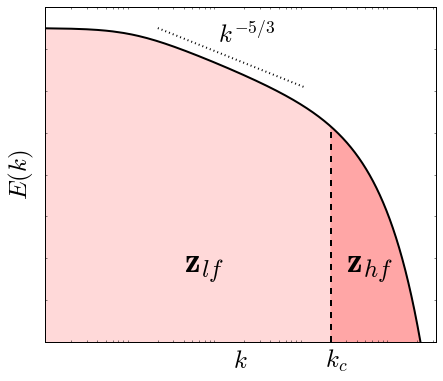

In [31]:
myfont = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **myfont)

kc=k0[2000]

fig=plt.figure(num=None, figsize=(7, 6), dpi=300, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)

kfit = array([2.e+01,1.E+03])
yfit = 1.E-00*(kfit/kfit[0])**(-5./3.)

fig = plt.plot(k0,spect,'k-',linewidth=2.0)
plot(kfit,yfit,'k:',linewidth=2.0)
plt.vlines(x=kc, ymin=10e-16,ymax=2*10e-6, color='k', linestyle='--', linewidth=2.0)

fill_between(k0[0:2000],spect[0:2000],0,color = (1,0.85,0.85))
fill_between(k0[2000:-1],spect[2000:-1],0,color=(1,0.65,0.65))

ax = plt.gca()
ax.set_xlim([1,n/2])
ax.set_ylim(1.E-15,1.E+01 )
ax.set_xscale('log')
ax.set_yscale('log')

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

ax.set_xlabel("$k$")
ax.set_ylabel('$E(k)$')

text(1.e+02,2.0E-01,'$k^{-5/3}$')
text(1.7E3,6E-17,'$k_c$')
text(4.e+01,2.0E-012,'$\mathbf{z}_{lf}$',fontsize=35)
text(3.e+03,2.0E-012,'$\mathbf{z}_{hf}$',fontsize=35)

savefig("./figures/turbulence_spectra_square.eps",bbox_inches='tight')